# TVL Concentration

In [1]:
"""load dependencies and define constants"""
import os
import sys
import requests
import numpy as np
import pandas as pd
from decimal import Decimal
from web3 import Web3
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

sys.path.append("..")
from yearn_data.yearn import Yearn
from yearn_data.utils.web3 import fetch_events

# constants
ZERO_ADDRESS = '0x0000000000000000000000000000000000000000'
FROM_BLOCK = 12965000  # London day
BATCH_SIZE = 500000
API_ENDPOINT = "https://api.etherscan.io/api"

In [2]:
"""get current block and load vaults from the yearn instance"""
load_dotenv()
w3 = Web3(Web3.HTTPProvider(os.environ['WEB3_PROVIDER']))
current_block = w3.eth.get_block("latest")["number"]
print(f"current block number: {current_block}")

yearn = Yearn()
vaults = yearn.vaults
print(f"loaded metadata for {len(vaults)} vaults (v2)")

current block number: 14719638
loaded metadata for 92 vaults (v2)


## Vault Comparison

### yvUSDC

In [3]:
"""get addresses that interacted with the yvUSDC vault"""
yvUSDC = [vault for vault in vaults if 'yvUSDC 0.4.3' in vault.name][0]
blocks = range(FROM_BLOCK, current_block, BATCH_SIZE)
denom = 10 ** yvUSDC.token.decimals

addresses = {}
for from_block in tqdm(blocks):
    to_block = from_block + BATCH_SIZE
    events = fetch_events(yvUSDC.address, "Transfer", from_block, to_block)
    # deposits
    deposits = [event for event in events if event['args']['sender'] == ZERO_ADDRESS]
    for deposit in deposits:
        address = deposit['args']['receiver']
        shares = Decimal(deposit['args']['value'] / denom)
        if address in addresses:
            addresses[address] += shares
        else:
            addresses[address] = shares
    # withdrawals
    withdrawals = [event for event in events if event['args']['receiver'] == ZERO_ADDRESS]
    for withdrawal in withdrawals:
        address = withdrawal['args']['sender']
        shares = Decimal(withdrawal['args']['value'] / denom)
        if address in addresses:
            addresses[address] -= shares
        else:
            addresses[address] = -shares

df_usdc = pd.DataFrame(addresses.items(), columns=['address', 'value'])
df_usdc.value = pd.to_numeric(df_usdc.value)
df_usdc.set_index(keys=['address'], inplace=True)
df_usdc.sort_values('value', inplace=True, ascending=False)
print(df_usdc.head(10))

  0%|          | 0/4 [00:00<?, ?it/s]

                                                   value
address                                                 
0xCc323557c71C0D1D20a1861Dc69c06C5f3cC9624  1.138627e+08
0x36822d0b11F4594380181cE6e76bd4986d46c389  5.656508e+07
0xDb91f52eEFE537e5256b8043e5f7C7F44d81f5aa  1.979699e+07
0xFf89C654846B2E4BC572cEABE77056daf7b299a3  9.868843e+06
0xF810E9fd20b35ACc901D88993b0F7Df1220C3eB6  7.804792e+06
0x888f1304821bCFb356cD28a5e8B3bc1F579F96E9  7.450158e+06
0x57A170cEC0c9Daa701d918d60809080C4Ba3C570  5.732895e+06
0x62d9855c399fDE8226840eA12D9F1Dd693a49B6A  4.476848e+06
0xFEB4acf3df3cDEA7399794D0869ef76A6EfAff52  4.441955e+06
0x32774415c506657E6373f392481971DaBF017c8E  3.965579e+06


Concentration: 75.25%


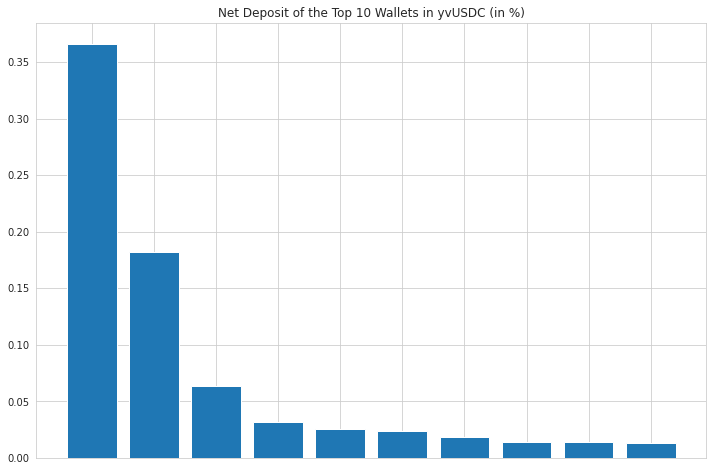

In [4]:
"""distribution of the top 10 wallets"""
net_usdc = df_usdc.copy()
net_usdc[net_usdc < 0] = 0.0

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.tick_params(labelbottom=False)
plt.bar(net_usdc.index[:10], net_usdc.value.iloc[:10] / net_usdc.value.sum())
plt.title("Net Deposit of the Top 10 Wallets in yvUSDC (in %)")

concentration = net_usdc.value.iloc[:10].sum() / net_usdc.value.sum()
print("Concentration: {:.2f}%".format(concentration * 100))

### yvSUSHI

In [5]:
"""get addresses that interacted with the yvSUSHI vault"""
yvSUSHI = [vault for vault in vaults if 'yvSUSHI 0.4.3' in vault.name][0]
blocks = range(FROM_BLOCK, current_block, BATCH_SIZE)
denom = 10 ** yvSUSHI.token.decimals

addresses = {}
for from_block in tqdm(blocks):
    to_block = from_block + BATCH_SIZE
    events = fetch_events(yvSUSHI.address, "Transfer", from_block, to_block)
    # deposits
    deposits = [event for event in events if event['args']['sender'] == ZERO_ADDRESS]
    for deposit in deposits:
        address = deposit['args']['receiver']
        shares = Decimal(deposit['args']['value'] / denom)
        if address in addresses:
            addresses[address] += shares
        else:
            addresses[address] = shares
    # withdrawals
    withdrawals = [event for event in events if event['args']['receiver'] == ZERO_ADDRESS]
    for withdrawal in withdrawals:
        address = withdrawal['args']['sender']
        shares = Decimal(withdrawal['args']['value'] / denom)
        if address in addresses:
            addresses[address] -= shares
        else:
            addresses[address] = -shares

df_sushi = pd.DataFrame(addresses.items(), columns=['address', 'value'])
df_sushi.value = pd.to_numeric(df_sushi.value)
df_sushi.set_index(keys=['address'], inplace=True)
df_sushi.sort_values('value', inplace=True, ascending=False)
print(df_sushi.head(10))

  0%|          | 0/4 [00:00<?, ?it/s]

                                                   value
address                                                 
0x92Be6ADB6a12Da0CA607F9d87DB2F9978cD6ec3E  75239.805937
0x77693Ff03FD85F9181E5e577b8CABfdDaC00880A  43846.954097
0x010Bc39979947c7E193e5619c9aC61DbD1Dc7ce0  23728.067751
0xCBD0EdBf33209E309B88c86772de17012d586fD6  19266.715427
0xF7B10D603907658F690Da534E9b7dbC4dAB3E2D6  18182.746463
0xf66468Ed50D9d635964DaEfa1AC3901A6faa4220  18036.871380
0x602B2d2278465eA5823898000140ceF95f2B8D56  17563.185302
0x5fd219D086eB375C2c90CDbe3ed9C164b5209059  13308.023839
0x81cb788A28134845e3Bae7DDad9CeF5b8B636a55  10509.111923
0xe89069529689849588CD65344c034A35289F44ea   9581.290762


Concentration: 52.52%


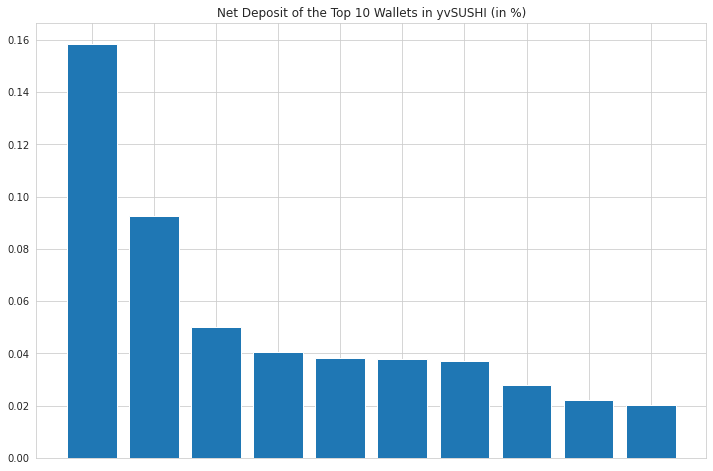

In [6]:
"""distribution of the top 10 wallets"""
net_sushi = df_sushi.copy()
net_sushi[net_sushi < 0] = 0.0

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.tick_params(labelbottom=False)
plt.bar(net_sushi.index[:10], net_sushi.value.iloc[:10] / net_sushi.value.sum())
plt.title("Net Deposit of the Top 10 Wallets in yvSUSHI (in %)")

concentration = net_sushi.value.iloc[:10].sum() / net_sushi.value.sum()
print("Concentration: {:.2f}%".format(concentration * 100))

### yvBOOST

In [7]:
"""get addresses that interacted with the yvBOOST vault"""
yvBOOST = [vault for vault in vaults if 'yvBOOST 0.3.5' in vault.name][0]
blocks = range(FROM_BLOCK, current_block, BATCH_SIZE)
denom = 10 ** yvBOOST.token.decimals

addresses = {}
for from_block in tqdm(blocks):
    to_block = from_block + BATCH_SIZE
    events = fetch_events(yvBOOST.address, "Transfer", from_block, to_block)
    # deposits
    deposits = [event for event in events if event['args']['sender'] == ZERO_ADDRESS]
    for deposit in deposits:
        address = deposit['args']['receiver']
        shares = Decimal(deposit['args']['value'] / denom)
        if address in addresses:
            addresses[address] += shares
        else:
            addresses[address] = shares
    # withdrawals
    withdrawals = [event for event in events if event['args']['receiver'] == ZERO_ADDRESS]
    for withdrawal in withdrawals:
        address = withdrawal['args']['sender']
        shares = Decimal(withdrawal['args']['value'] / denom)
        if address in addresses:
            addresses[address] -= shares
        else:
            addresses[address] = -shares

df_boost = pd.DataFrame(addresses.items(), columns=['address', 'value'])
df_boost.value = pd.to_numeric(df_boost.value)
df_boost.set_index(keys=['address'], inplace=True)
df_boost.sort_values('value', inplace=True, ascending=False)
print(df_boost.head(10))

  0%|          | 0/4 [00:00<?, ?it/s]

                                                    value
address                                                  
0x9461173740D27311b176476FA27e94C681b1Ea6b  716056.694675
0x92Be6ADB6a12Da0CA607F9d87DB2F9978cD6ec3E  706200.667096
0x153865375d91DFB5A190CF1a4643829421bA562e  611342.903809
0x34dDFC06ce0c39242Fb380066Ee01e409a4a525e  298013.443043
0x9d409a0A012CFbA9B15F6D4B36Ac57A46966Ab9a  134313.715786
0x57a2437E6062Dd9363886a4fa717aC0C266bA82B  124712.044477
0x280BF69d522BbCFb3aEb138C59D85A16e449057c  121064.871511
0xCa86D57519dbFE34A25EEf0923b259ab07986B71  118579.504088
0x5CbF8C43b11a3B120d2cC2955F9B638303E0d22F   92816.236130
0x23Be060093Db74f38B1a3daF57AfDc1a23dB0077   89761.873069


Concentration: 71.62%


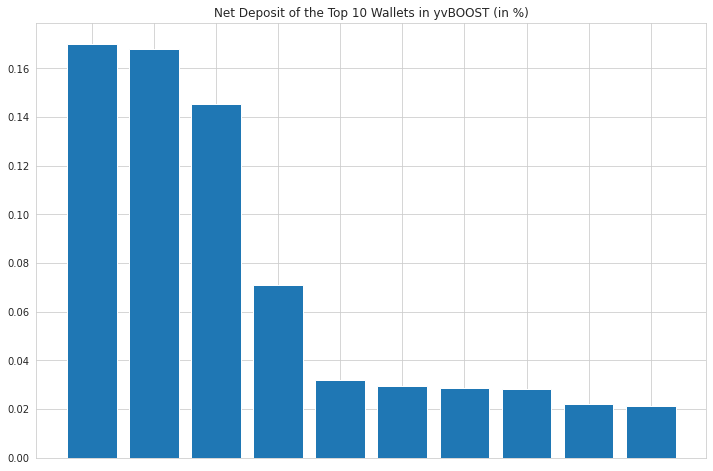

In [8]:
"""distribution of the top 10 wallets"""
net_boost = df_boost.copy()
net_boost[net_boost < 0] = 0.0

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.tick_params(labelbottom=False)
plt.bar(net_boost.index[:10], net_boost.value.iloc[:10] / net_boost.value.sum())
plt.title("Net Deposit of the Top 10 Wallets in yvBOOST (in %)")

concentration = net_boost.value.iloc[:10].sum() / net_boost.value.sum()
print("Concentration: {:.2f}%".format(concentration * 100))

### More Metrics

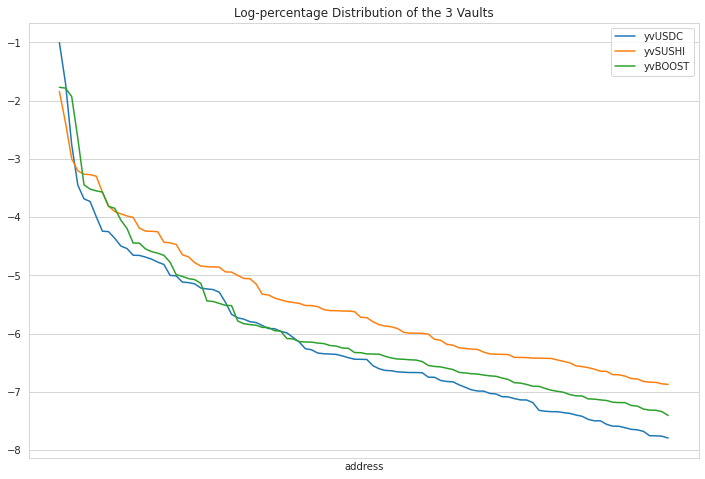

In [9]:
"""the log-percentage distribution of the top 100 addresses"""
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(12, 8))
plt.title("Log-percentage Distribution of the 3 Vaults")
ax.set_xticks([])

np.log(net_usdc.value.iloc[:100] / net_usdc.value.sum()).plot(ax=ax, label='yvUSDC')
np.log(net_sushi.value.iloc[:100] / net_sushi.value.sum()).plot(ax=ax, label='yvSUSHI')
np.log(net_boost.value.iloc[:100] / net_boost.value.sum()).plot(ax=ax, label='yvBOOST')
_ = plt.legend(loc='upper right')

Gini Coefficient of yvUSDC: 0.983889
Gini Coefficient of yvSUSHI: 0.923565
Gini Coefficient of yvBOOST: 0.958183


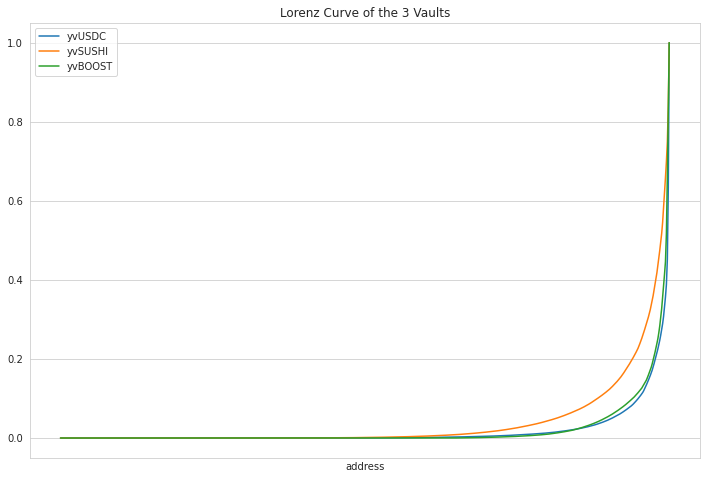

In [10]:
"""the Lorenz Curve and the Gini Coefficient"""
sns.set_style('whitegrid')
_, ax = plt.subplots(figsize=(12, 8))
plt.title("Lorenz Curve of the 3 Vaults")
ax.set_xticks([])

# lorenz curve
num_samples = min(len(net_usdc), len(net_sushi), len(net_boost))
lorenz_usdc = net_usdc.value.iloc[:num_samples].sort_values().cumsum() / net_usdc.value[:num_samples].sum()
lorenz_sushi = net_sushi.value.iloc[:num_samples].sort_values().cumsum() / net_sushi.value[:num_samples].sum()
lorenz_boost = net_boost.value.iloc[:num_samples].sort_values().cumsum() / net_boost.value[:num_samples].sum()

lorenz_usdc.plot(ax=ax, label='yvUSDC')
lorenz_sushi.plot(ax=ax, label='yvSUSHI')
lorenz_boost.plot(ax=ax, label='yvBOOST')
_ = plt.legend(loc='upper left')

# gini coefficient
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

print("Gini Coefficient of yvUSDC: {:.6f}".format(gini(net_usdc.value.values)))
print("Gini Coefficient of yvSUSHI: {:.6f}".format(gini(net_sushi.value.values)))
print("Gini Coefficient of yvBOOST: {:.6f}".format(gini(net_boost.value.values)))